In [461]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Objective

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

------------------------

<a id='btt'></a>
**1. <a href = #link1>Overview of the data</a>**

**2. <a href = #link3>Data Visualization</a>**

**3. <a href = #link4>Missing Value and Outlier Treatment</a>**

**4. <a href = #link5>Data Preparation for modeling</a>**

**5. <a href = #link6>Logistic Regression</a>**

**6. <a href = #link7>Decision Tree</a>**

**7. <a href = #link8>Conclusions</a>**


# <a id='link1'>Overview of the Data</a>
 <a href ='#btt'>back to top</a>

In [462]:
data = pd.read_csv("Loan_Modelling.csv", dtype={'ZIPCode': 'str'})
np.random.seed(1)
data.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


In [433]:
data.shape

(5000, 14)

In [434]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [435]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [436]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,5000,NaN,NaN,NaN,2500.5,1443.52,1,1250.75,2500.5,3750.25,5000
Age,5000,NaN,NaN,NaN,45.3384,11.4632,23,35,45,55,67
Experience,5000,NaN,NaN,NaN,20.1046,11.468,-3,10,20,30,43
Income,5000,NaN,NaN,NaN,73.7742,46.0337,8,39,64,98,224
ZIPCode,5000,467,94720,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family,5000,NaN,NaN,NaN,2.3964,1.14766,1,1,2,3,4
CCAvg,5000,NaN,NaN,NaN,1.93794,1.74766,0,0.7,1.5,2.5,10
Education,5000,NaN,NaN,NaN,1.881,0.839869,1,1,2,3,3
Mortgage,5000,NaN,NaN,NaN,56.4988,101.714,0,0,0,101,635
Personal_Loan,5000,NaN,NaN,NaN,0.096,0.294621,0,0,0,0,1


## Observations
The data consists of 5000 entries.  It does not appear to have any mission values so far except Eperience has NEGATIVE values included.  ID is going to be droped and Zipcode will be aswell except for some observations.  

In [437]:
data.drop(['ID'],axis=1,inplace=True)

In [438]:
#observations of experience with negative valuse
data[data['Experience'] < 0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


There doesn't seem to be anything linking those with negative values so I'll be replacing those with zeroes

In [439]:
data.Experience = data.Experience.apply(lambda x: 0 if x < 0 else x)

In [440]:
#creating a cross tab to make observations on zipcodes
df_2 = pd.crosstab(data['ZIPCode'], df['Personal_Loan'])

In [441]:
dfz= df_2[[ 1]].sort_values(1, ascending=True).nlargest(15, 1)

In [442]:
dfz.info

<bound method DataFrame.info of Personal_Loan   1
ZIPCode          
94720          19
94305          13
92093           9
94304           8
90095           8
90089           8
92182           7
95051           6
94022           6
95616           6
95054           5
95814           5
92037           5
91380           5
94928           5>

## Observation:
The list above represents the 15 Zipcodes wihe the highest amounts of customers with personal loans.  

# <a id='link3'>Data Visualizations</a>
 <a href ='#btt'>back to top</a>

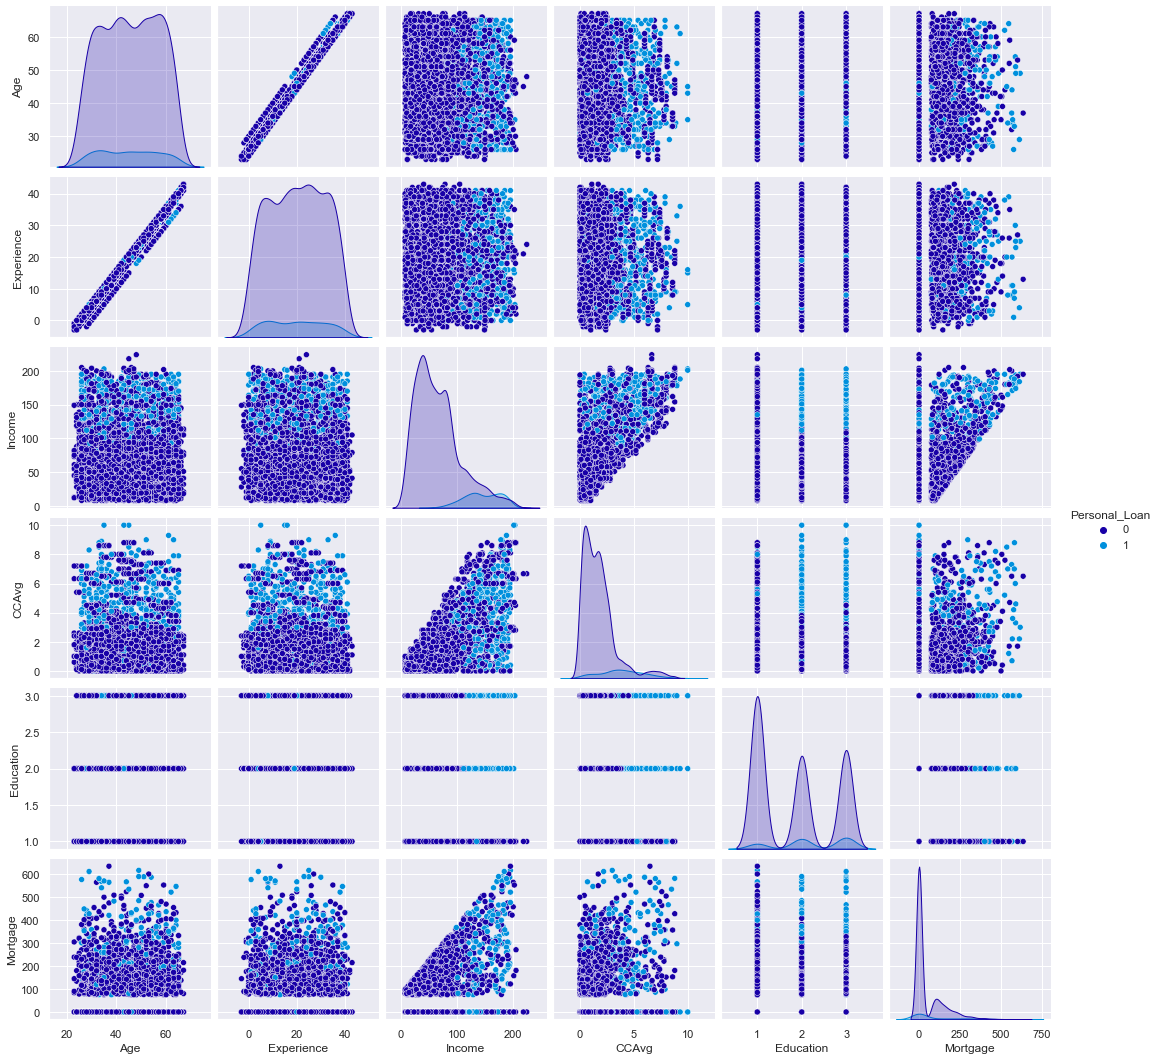

In [463]:
df_num = data.filter(['Age', 'Experience', 'Income', 'CCAvg', 'Education','Mortgage', 'Personal_Loan', 'ZIPCode'])

sns.pairplot(df_num , hue="Personal_Loan" )

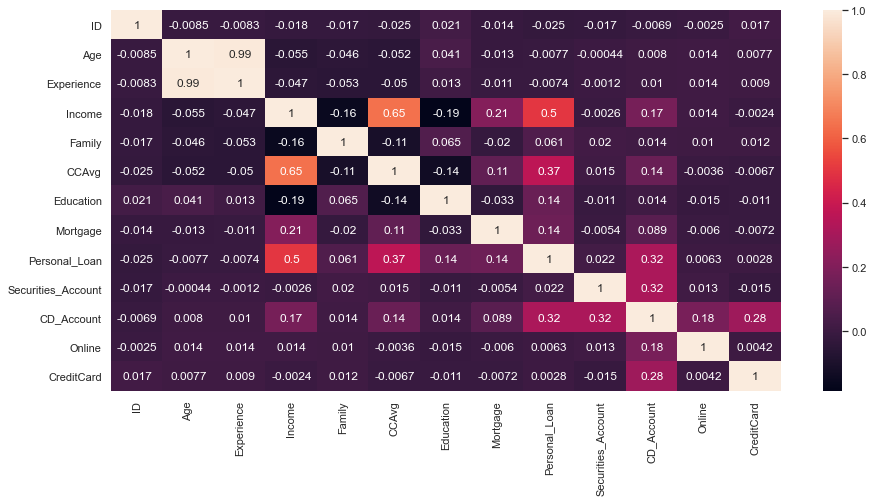

In [464]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Observations:
* Experience and Age are HIGHLY correlated so I'll more than likely be dropping one during modeling
* CCAvg, Income, and Mortgage all have positive correlations with our target variable
* CCAvg and income also have positive correlation


In [184]:

def histogram_boxplot(feature, figsize=(10, 5), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

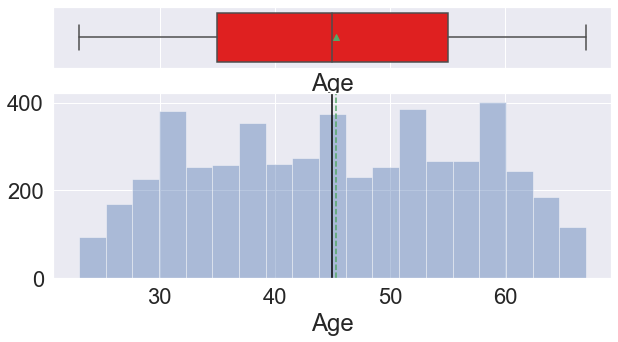

In [170]:
histogram_boxplot(df["Age"])

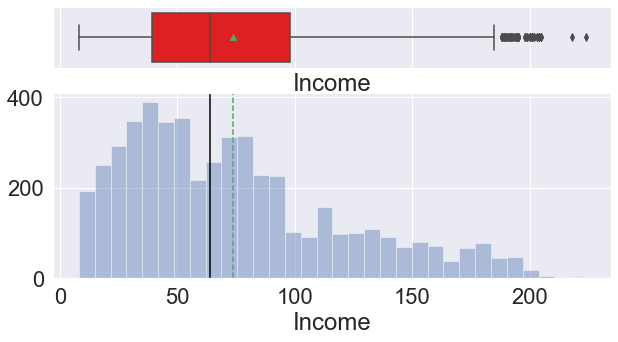

In [171]:
histogram_boxplot(df["Income"])

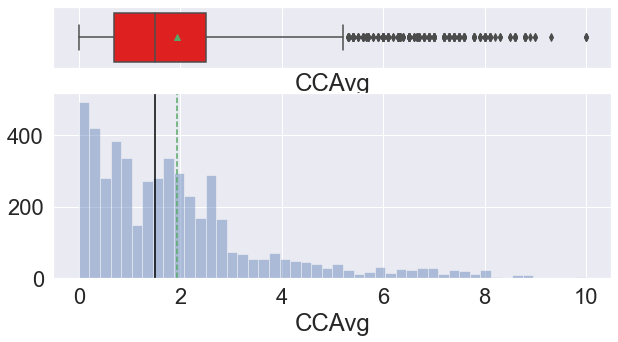

In [172]:
histogram_boxplot(df["CCAvg"])

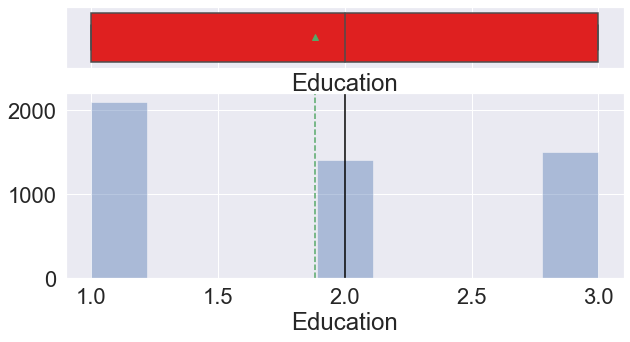

In [173]:
histogram_boxplot(df["Education"])

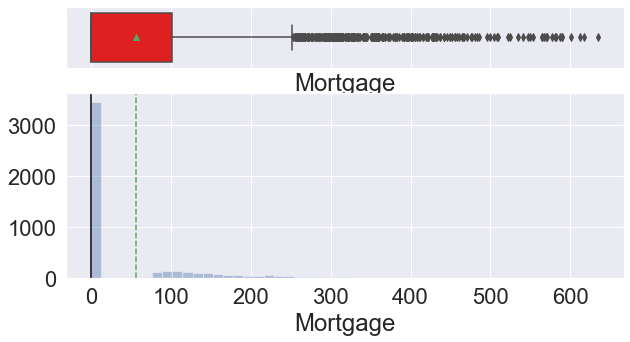

In [174]:
histogram_boxplot(df["Mortgage"])

## Observations
* Age is normally distributed
* Income, CCAvg, and mortgage are right scewed with mortgage having heavy outliers.  This may be a result of there being zeros in place for renters.  

In [182]:
#I want to take a look at mortgage without renters
df_m =data[data['Mortgage'] != 0]

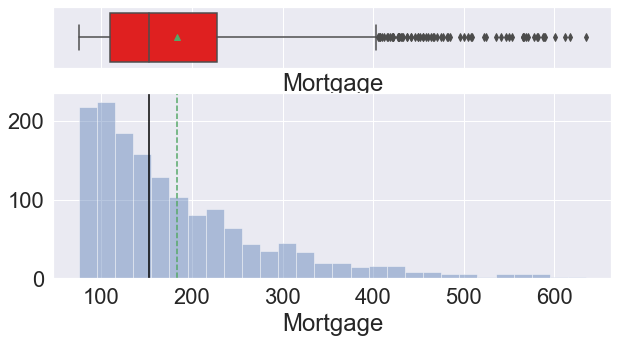

In [185]:
histogram_boxplot(df_m["Mortgage"])

Looking at mortgage with renters removed looks better but is still right skewed.  I'll continue to model with both included.

In [189]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


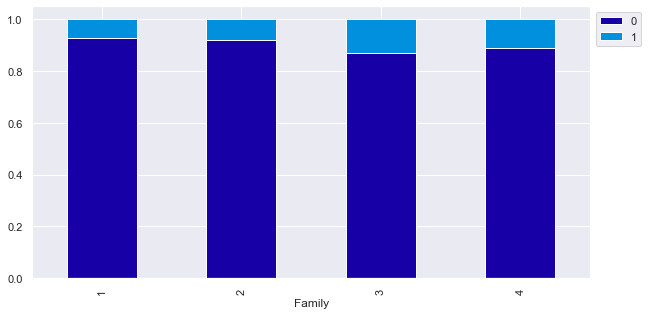

In [190]:
stacked_plot(data['Family'])
ms_pc(ax,data['Family'])

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


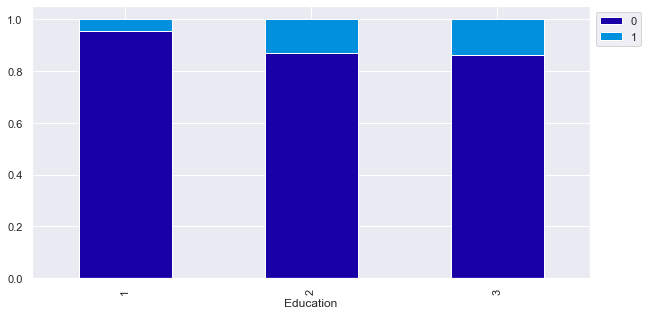

In [156]:
stacked_plot(data['Education'])

## Observation
* Those with 3 or more childeren have higher amount of personal loans.
* Those With education of 2 or more have higher amounts of personal loans.

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


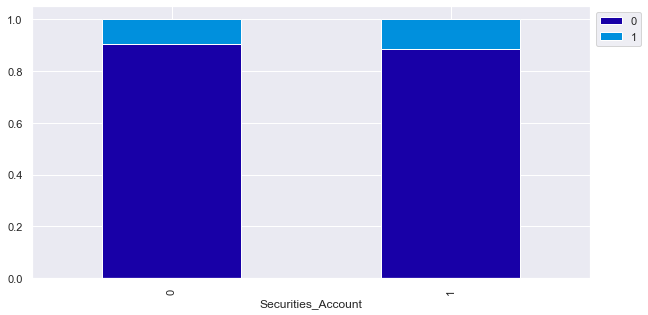

In [184]:
stacked_plot(data['Securities_Account'])

Personal_Loan     0    1   All
Mortgage                      
0              3150  312  3462
All            3150  312  3462
------------------------------------------------------------------------------------------------------------------------


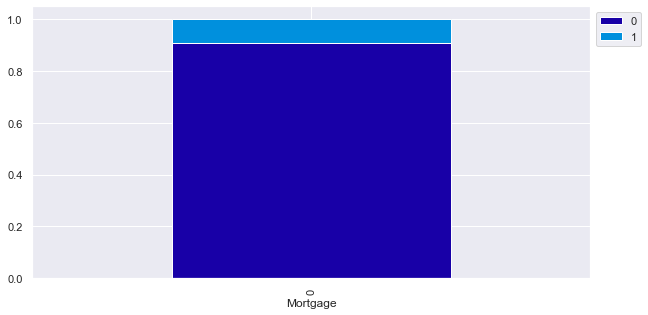

In [187]:
df_m1 =data[data['Mortgage'] == 0]
stacked_plot(df_m1['Mortgage'])

Only a small percentage of renters have personal loans but also renters make up a good portion of the sample size.

<AxesSubplot:xlabel='CCAvg', ylabel='Income'>

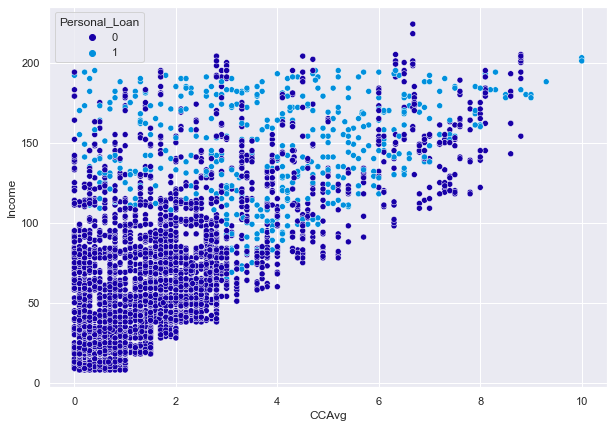

In [186]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Income", x="CCAvg", hue="Personal_Loan", data=data)

The data shows that those with incomes higher that 100k and with a CCAvg higher that 2.5 seem to have mor personal loans.

<AxesSubplot:xlabel='Mortgage', ylabel='Income'>

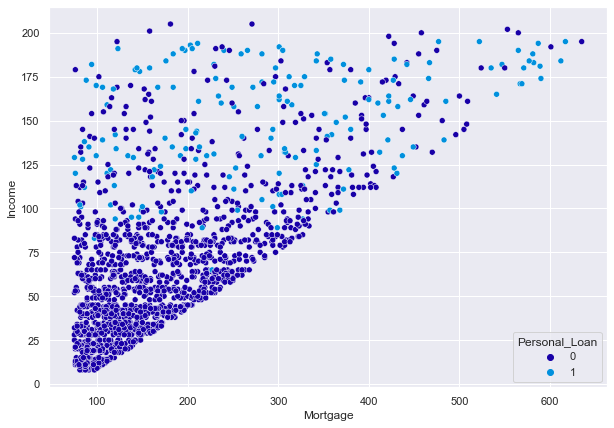

In [191]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Income", x="Mortgage", hue="Personal_Loan", data=df_m)

<AxesSubplot:xlabel='Income', ylabel='Age'>

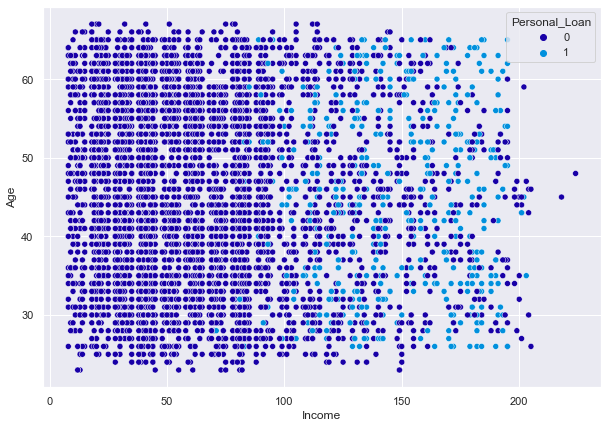

In [193]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Age", x="Income", hue="Personal_Loan", data=data)

Age doesn't seem to play a big factore in peronal loans but Income does.

In [325]:
data.drop(['ZIPCode'],axis=1,inplace=True)

# <a id='link4'>Missing Value and Outlier Treatment</a>
 <a href ='#btt'>back to top</a>

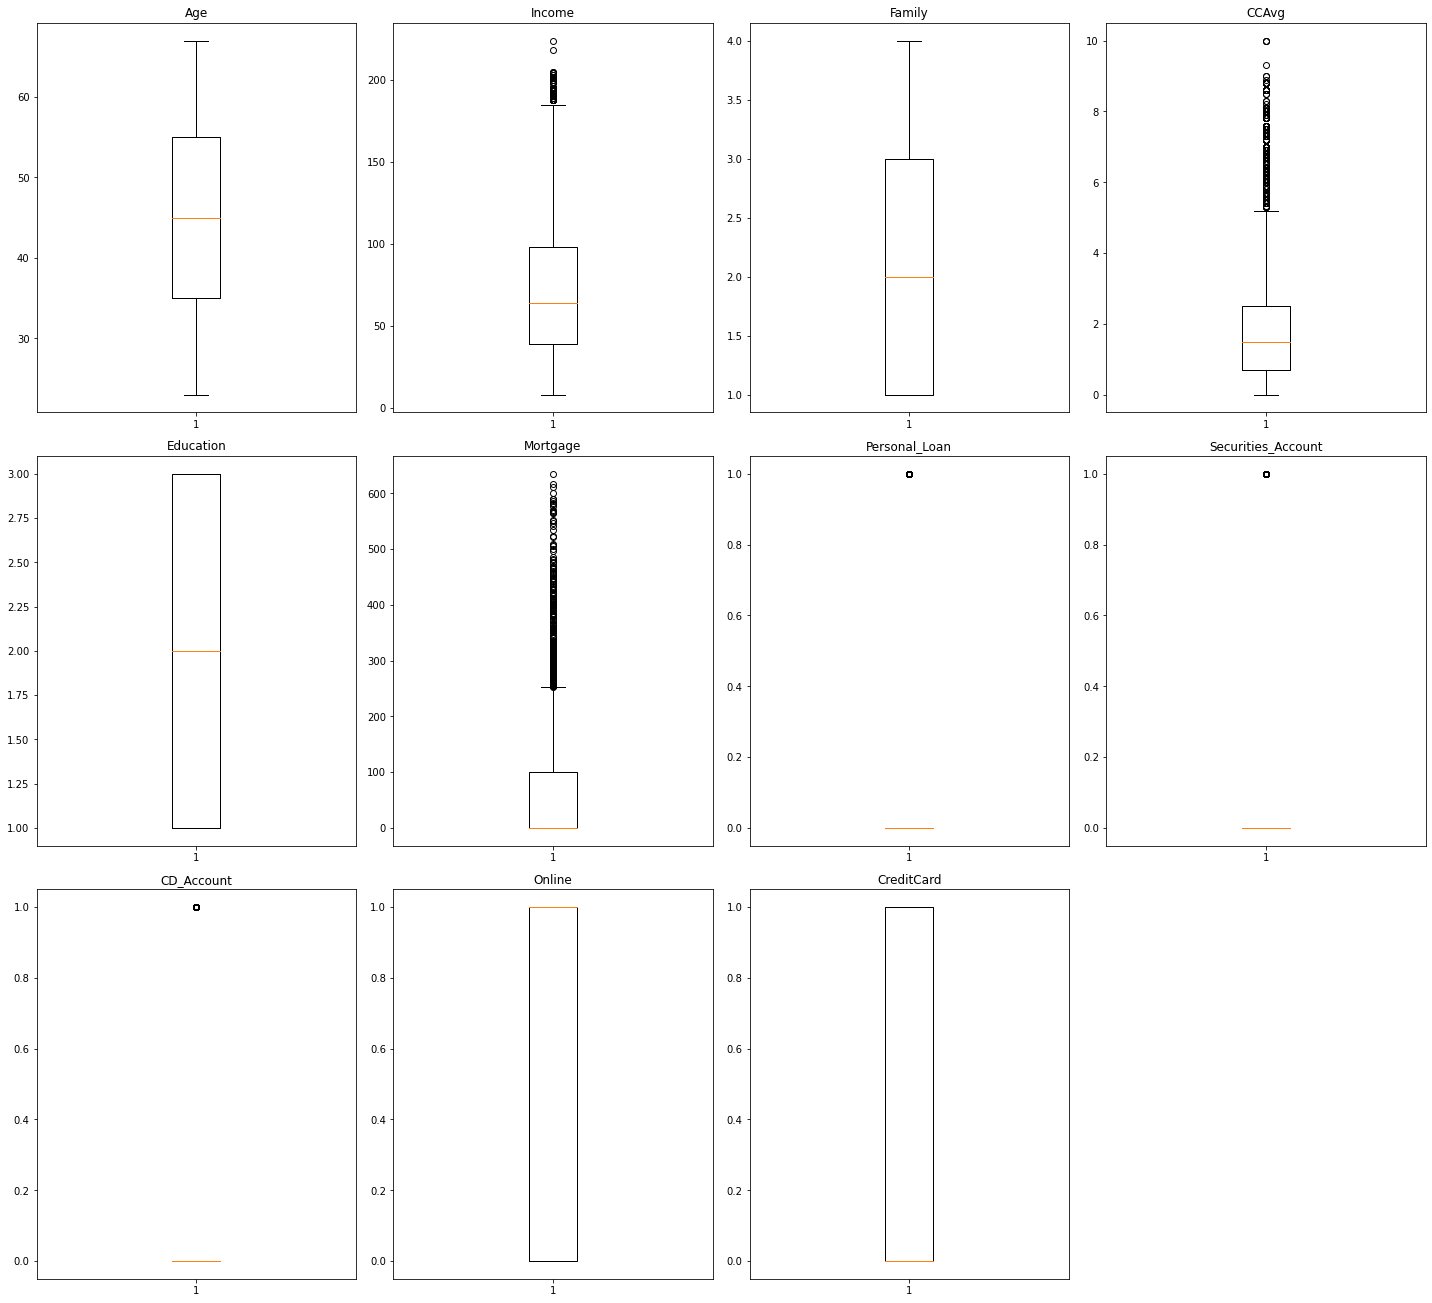

In [114]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [326]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [327]:
#I've decided to just treat income and CCavg.
data = treat_outliers(data, 'Income')
data = treat_outliers(data, 'CCAvg')
data = treat_outliers(data, 'Mortgage')

# <a id='link5'>Data Preparation for Modeling</a>
 <a href ='#btt'>back to top</a>

In [220]:
df1 = data.copy()

In [221]:
def split(*kwargs):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = data.drop([*kwargs], axis=1)
    Y = data['Personal_Loan']

    X = pd.get_dummies(X,drop_first=True)
    X = add_constant(X)

    #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [222]:
X_train,X_test, y_train, y_test = split('Personal_Loan')

* The get_metrics_score1 function will be used to check the model performance of models built using the statsmodels library.
* The get_metrics_score2 function will be used to check the model performance of models built using the Sklearn library.

In [223]:
def get_metrics_score1(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [224]:
def get_metrics_score2(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [233]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual","Actual"]],
                  columns = [i for i in ['Predicted','Predicted']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# <a id='link6'>Logistic Regression</a>
 <a href ='#btt'>back to top</a>

With the ojective here being a focus for the marketing department to hone in on potential customers who have a  higher probability of purchasing a personal lone, I have decided the importance of this modeling should be on maximizing those potential customers.  Thus attention will be placed on reduction of false negatives in the model.  

Logistic Regression with SKlearn Library

In [226]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score2(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9542857142857143
Accuracy on test set :  0.9466666666666667
Recall on training set :  0.649546827794562
Recall on test set :  0.5838926174496645
Precision on training set :  0.8301158301158301
Precision on test set :  0.8285714285714286
F1 on training set :  0.7288135593220338
F1 on test set :  0.6850393700787403


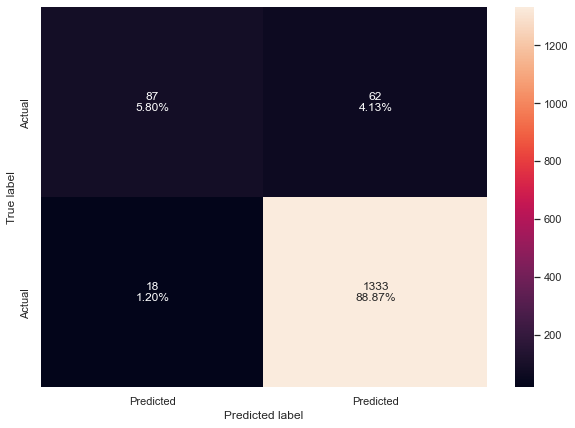

In [234]:
make_confusion_matrix(lr,X_test,y_test)

Logistic Regression iwht Statsmodles library

In [227]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.116577
         Iterations 9
Accuracy on training set :  0.9577142857142857
Accuracy on test set :  0.9506666666666667
Recall on training set :  0.6737160120845922
Recall on test set :  0.610738255033557
Precision on training set :  0.8479087452471483
Precision on test set :  0.8504672897196262
F1 on training set :  0.7508417508417509
F1 on test set :  0.7109375000000001


The recall for statsmodel is still farily low Lets take a look at some signifcence factores and see if we can't tune this up a bit.

In [237]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Jun 2021   Pseudo R-squ.:                  0.6275
Time:                        14:38:02   Log-Likelihood:                -408.02
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                3.158e-288
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.8063      2.014     -6.855      0.000     -17.754      -9.859
Age                   -0.0424      0.074     -0.576      0.565      -0.187       0.102
Experience             0.0511      0.074      0.693      0.488      -0.093       0.195
Income                 0.0558      0.003     16.232      0.000       0.049       0.063
Family                 0.7722      0.097      7.979      0.000       0.582       0.962
CCAvg                  0.4022      0.067      6.046      0.000       0.272       0.533
Education              1.8316      0.149     12.332      0.000       1.541       2.123
Mortgage               0.0011      0.001      1.222      0.222      -0.001       0.003
Securities_Account    -1.1737      0.382     -3.075      0.002      -1.922      -0.426
CD_Account             3.8388      0.411      9.347      0.000       3.034       4.644
Online                -0.6689      0.197     -3.400      0.001      -1.054      -0.283
CreditCard            -1.1663      0.254     -4.584      0.000      -1.665      -0.668
======================================================================================
"""

As visualized earlier, Age and Experience are highly correlated and it shows in our Pvalues

In [238]:
X_train_num = X_train.astype(float).copy()

In [239]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 457.641678
Age                    95.464775
Experience             95.425641
Income                  1.810088
Family                  1.032010
CCAvg                   1.705960
Education               1.115303
Mortgage                1.019432
Securities_Account      1.144483
CD_Account              1.355609
Online                  1.040646
CreditCard              1.109215
dtype: float64



Varience Inflaction factor shows HIGH multi-collinearity with age and experience. SO I will be dropping experience.

In [240]:
X_train_num1 = X_train_num.drop('Experience',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train_num1.values,i) for i in range(X_train_num1.shape[1])],index=X_train_num1.columns)
print('Series AFTER feature selection: \n\n{}\n'.format(vif_series2))

Series AFTER feature selection: 

const                 35.763416
Age                    1.009979
Income                 1.805320
Family                 1.031279
CCAvg                  1.699545
Education              1.047229
Mortgage               1.019407
Securities_Account     1.144064
CD_Account             1.354625
Online                 1.040498
CreditCard             1.109168
dtype: float64



All are now below 5 so the model shouldn't suffer from multi-collinearity.

In [241]:
X_train1,X_test1, y_train1, y_test1 = split('Personal_Loan')

In [242]:
X_train1.drop(['Experience'],axis=1,inplace=True)
X_test1.drop(['Experience'],axis=1,inplace=True)

In [243]:
logit1 = sm.Logit(y_train1, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg1,X_train1,X_test1,y_train1,y_test1)

Optimization terminated successfully.
         Current function value: 0.116647
         Iterations 9
Accuracy on training set :  0.9577142857142857
Accuracy on test set :  0.9506666666666667
Recall on training set :  0.6737160120845922
Recall on test set :  0.610738255033557
Precision on training set :  0.8479087452471483
Precision on test set :  0.8504672897196262
F1 on training set :  0.7508417508417509
F1 on test set :  0.7109375000000001


No real significent changes in the model

In [244]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Wed, 16 Jun 2021   Pseudo R-squ.:                  0.6273
Time:                        14:42:02   Log-Likelihood:                -408.26
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                3.348e-289
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.0607      0.904    -16.668      0.000     -16.832     -13.290
Age                    0.0083      0.008      1.031      0.303      -0.008       0.024
Income              

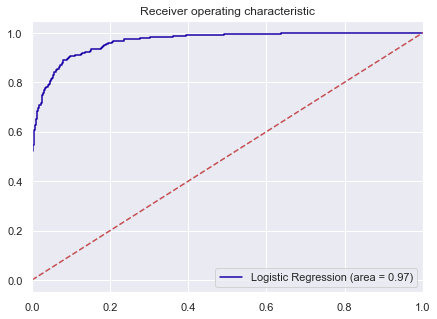

In [246]:
logit_roc_auc_train = roc_auc_score(y_train1, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train1, lg1.predict(X_train1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

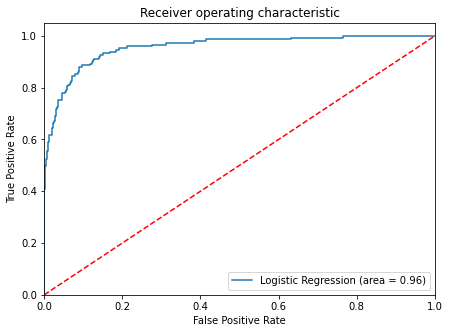

In [72]:
logit_roc_auc_test = roc_auc_score(y_test1, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, lg1.predict(X_test1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The AUC for both train and test are .97 and .96 This is actually quite good.  Lets see if we can't improcve the model with the optimal threshold using AUC-ROC curve

In [247]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test1, lg1.predict(X_test1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.09358301025994298


In [248]:
scores_LR = get_metrics_score1(lg1,X_train1,X_test1,y_train1,y_test1,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.9025714285714286
Accuracy on test set :  0.9066666666666666
Recall on training set :  0.9063444108761329
Recall on test set :  0.87248322147651
Precision on training set :  0.4918032786885246
Precision on test set :  0.5179282868525896
F1 on training set :  0.6376195536663124
F1 on test set :  0.65
ROC-AUC Score on training set :  0.9042608769432732
ROC-AUC Score on test set :  0.8914599675110159


recall has increased significantly while ROCAUC has dropped.  Precision has also suffered.  Lets look at Precision-Recall curve to find a better threshold.

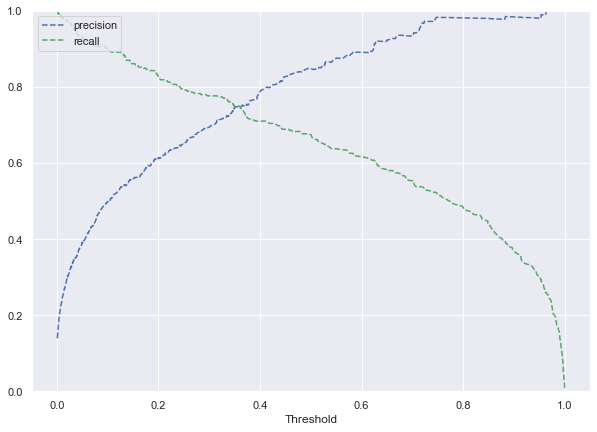

In [250]:
y_scores=lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train1, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At .35 we have balanced precision and recall

In [251]:
optimal_threshold_curve = 0.35

scores_LR = get_metrics_score1(lg1,X_train1,X_test1,y_train1,y_test1,threshold=optimal_threshold_curve,roc=True)

Accuracy on training set :  0.9522857142857143
Accuracy on test set :  0.9446666666666667
Recall on training set :  0.7492447129909365
Recall on test set :  0.6711409395973155
Precision on training set :  0.7469879518072289
Precision on test set :  0.746268656716418
F1 on training set :  0.7481146304675717
F1 on test set :  0.7067137809187279
ROC-AUC Score on training set :  0.8613689642581694
ROC-AUC Score on test set :  0.8229871981480286


recall has suffered but precision has increased

In [83]:
# defining list of model
models = [lg1]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train1,X_test1,y_train1,y_test1,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [84]:
# defining list of model
models = [lg1]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train1,X_test1,y_train1,y_test1,threshold=optimal_threshold_auc_roc,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [86]:
# defining list of model
models = [lg1]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train1,X_test1,y_train1,y_test1,threshold=optimal_threshold_curve,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [88]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0 .093',
                                          'Logistic Regression - Optimal threshold = 0 .35'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model - Statsmodels,0.957714,0.950667,0.673716,0.610738,0.847909,0.850467,0.750842,0.710938
1,Logistic Regression - Optimal threshold = 0 .093,0.902571,0.906667,0.906344,0.872483,0.491803,0.517928,0.637620,0.650000
2,Logistic Regression - Optimal threshold = 0 .38,0.952286,0.944667,0.716012,0.664430,0.764516,0.750000,0.739470,0.704626


## Logistic Regression Conclusions:
I do not feel this is the model to be using for this particular data set.  While even balanced the precision and recall barely rise avove the 60s and 70s.  I think it's best to try a decision tree insead.

# <a id='link7'>Decision Tree</a>
 <a href ='#btt'>back to top</a>

In [361]:
df = data.copy()

In [365]:
df = df.drop('Experience',axis=1)

In [363]:
# x = df.drop("Personal_Loan", "Experience" , axis=1)
# y = df.pop("Personal_Loan")

In [366]:
x = df.drop('Personal_Loan',axis=1)                                                # Features
y = df['Personal_Loan'] 

In [368]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=1)

In [369]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3500, 10)
(1500, 10)
(3500,)
(1500,)


In [370]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [371]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(xtest)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

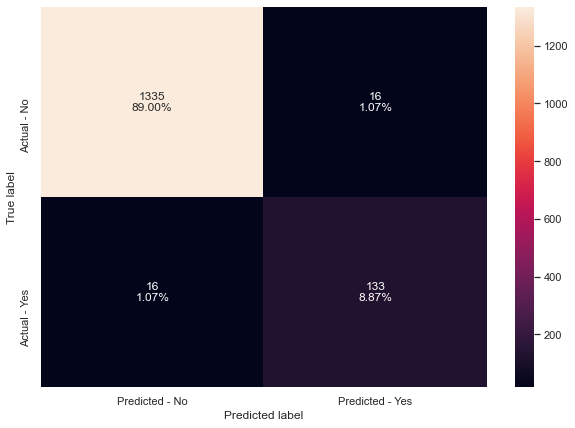

In [372]:
make_confusion_matrix(model,ytest)

Right away we can see that the false negatives are only slightly lower but the false positives have decreased significantly. 

In [373]:
##  Function to calculate recall score
def get_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    print("Accuracy on training set : ",metrics.accuracy_score(ytrain,pred_train))
    print("Accuracy on test set : ",metrics.accuracy_score(ytest,pred_test))
    print("Recall on training set : ",metrics.recall_score(ytrain,pred_train))
    print("Recall on test set : ",metrics.recall_score(ytest,pred_test))
    print("Precision on training set : ",metrics.precision_score(ytrain,pred_train))
    print("Precision on test set : ",metrics.precision_score(ytest,pred_test))
    print("F1 Score on training set : ",metrics.f1_score(ytrain,pred_train))
    print("F1 Score on test set : ",metrics.f1_score(ytest,pred_test))

In [374]:
get_score(model)

Accuracy on training set :  1.0
Accuracy on test set :  0.9786666666666667
Recall on training set :  1.0
Recall on test set :  0.8926174496644296
Precision on training set :  1.0
Precision on test set :  0.8926174496644296
F1 Score on training set :  1.0
F1 Score on test set :  0.8926174496644297


As observed from the confusion Matrix this model performs much better in all aspects even intitially.

In [378]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


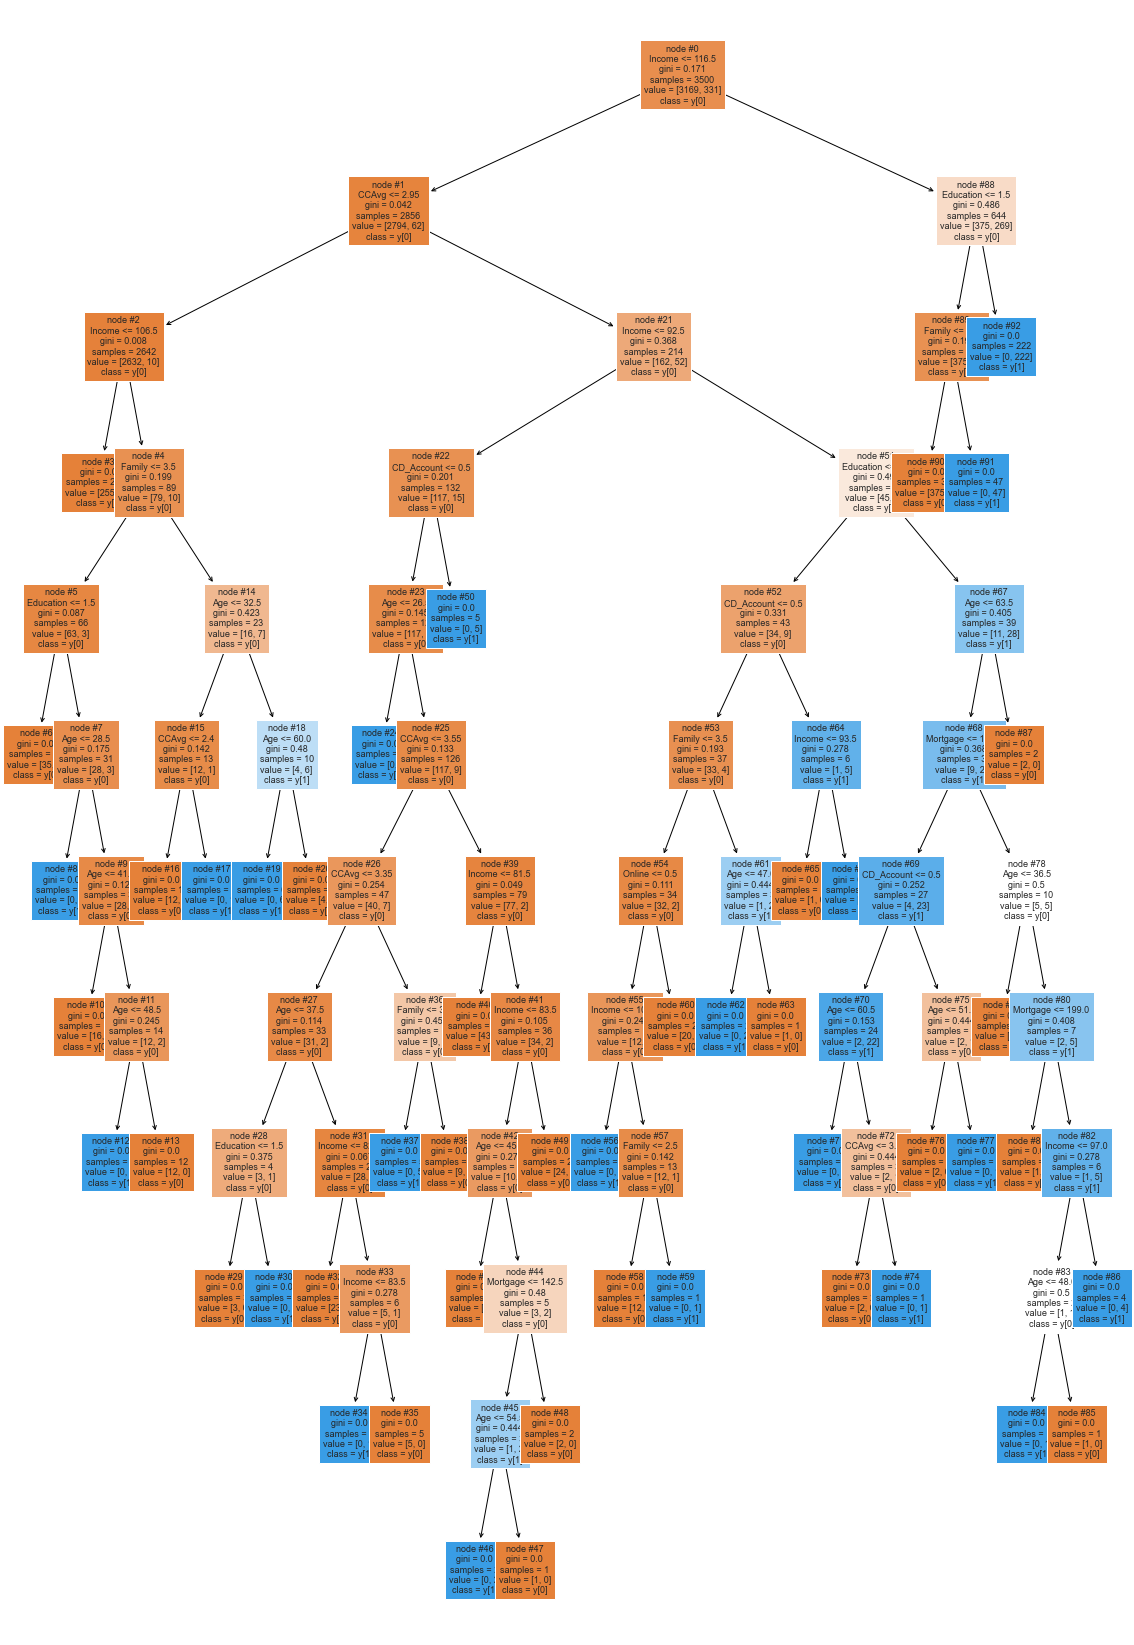

In [379]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [380]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class:

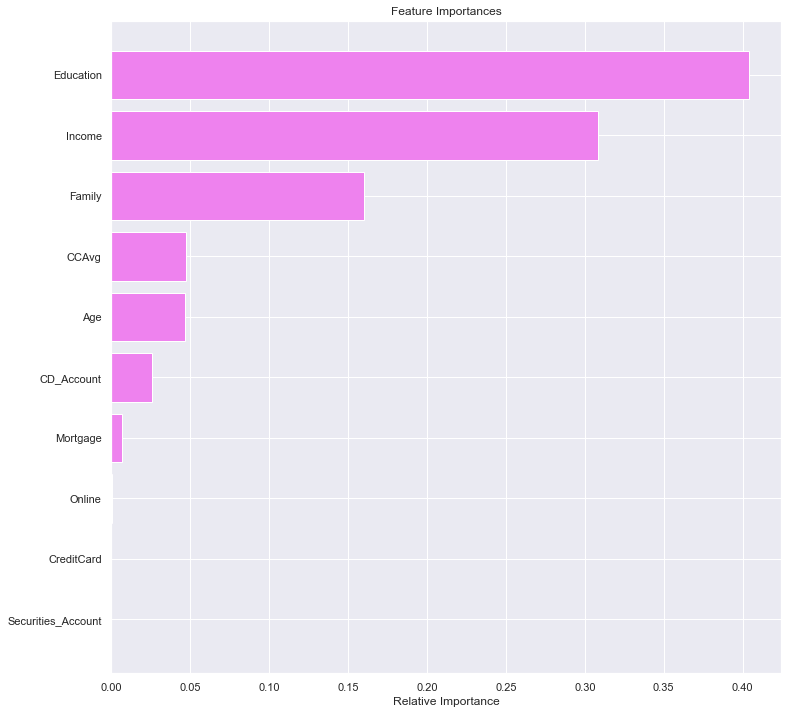

In [381]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Education, Income, and Family seem to be the most important features in this model.

In [382]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

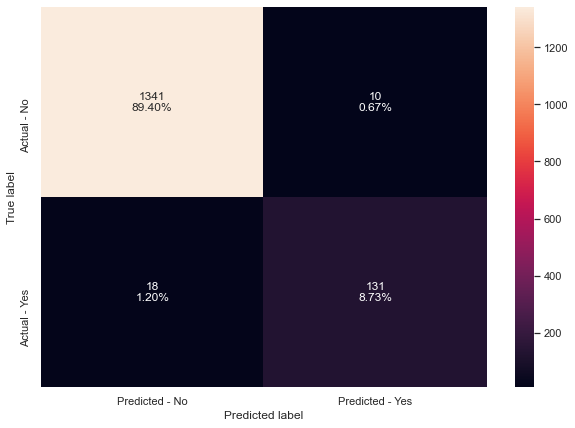

In [383]:
make_confusion_matrix(estimator,ytest)

In [384]:
get_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832
Precision on training set :  0.9623824451410659
Precision on test set :  0.9290780141843972
F1 Score on training set :  0.9446153846153847
F1 Score on test set :  0.9034482758620689


While precision had a slight increase recall suffered a slight decrease.

In [385]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


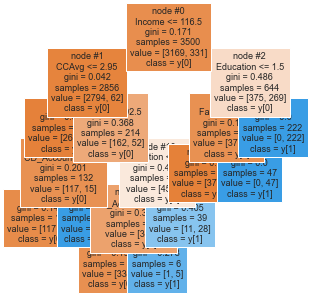

In [386]:
plt.figure(figsize=(5,5))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [387]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [388]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000238,0.001590
3,0.000268,0.002664
4,0.000340,0.003004
5,0.000359,0.004079
6,0.000381,0.004460
7,0.000381,0.004841
8,0.000381,0.005222
9,0.000409,0.006859


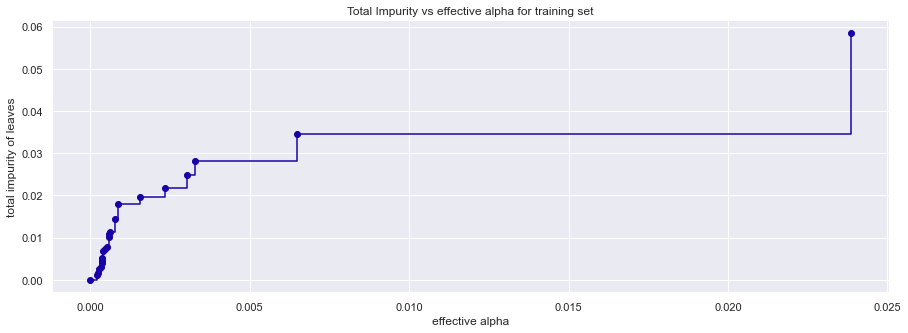

In [389]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [390]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


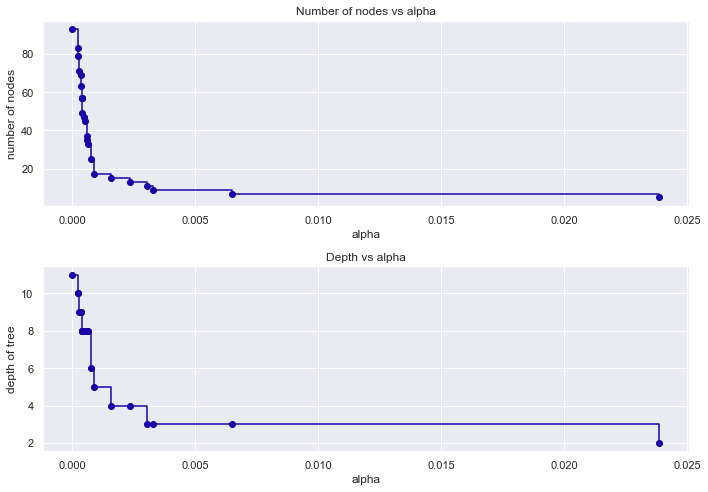

In [391]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [392]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(xtrain)
    values_train=metrics.recall_score(ytrain,pred_train3)
    recall_train.append(values_train)

In [393]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(xtest)
    values_test=metrics.recall_score(ytest,pred_test3)
    recall_test.append(values_test)

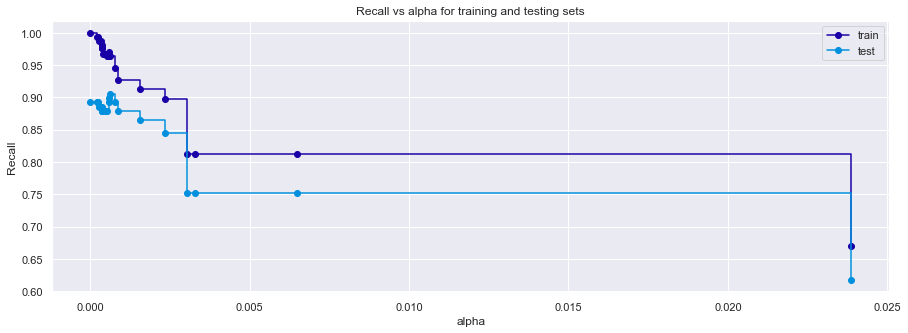

In [394]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [395]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


In [396]:
get_score(best_model)

Accuracy on training set :  0.9931428571428571
Accuracy on test set :  0.984
Recall on training set :  0.9637462235649547
Recall on test set :  0.9060402684563759
Precision on training set :  0.9637462235649547
Precision on test set :  0.9310344827586207
F1 Score on training set :  0.9637462235649547
F1 Score on test set :  0.9183673469387755


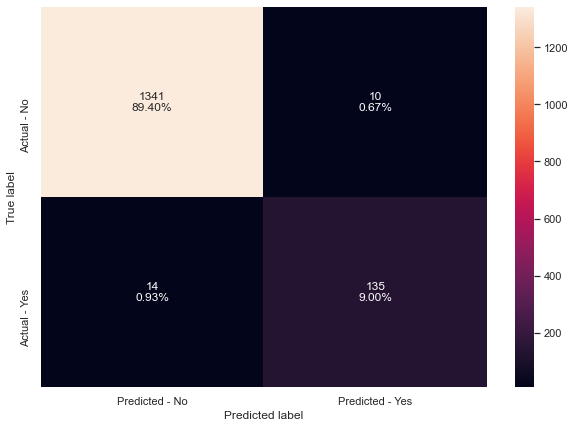

In [397]:
make_confusion_matrix(best_model,ytest)

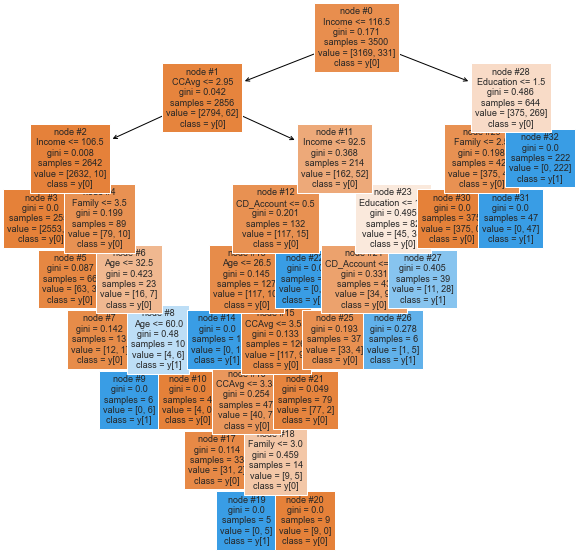

In [398]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [399]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = xtrain.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.429489
Income              0.319013
Family              0.164852
CCAvg               0.045185
CD_Account          0.024298
Age                 0.017163
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


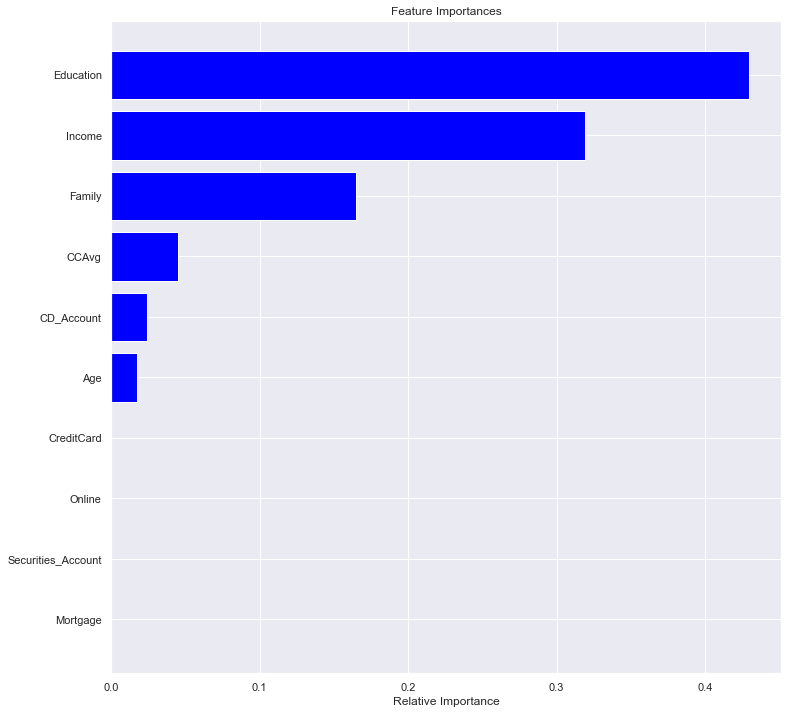

In [400]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [402]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1, 0.92,0.96], 'Test_Recall':[0.89,.87,0.90]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.89
1,Decision treee with hyperparameter tuning,0.92,0.87
2,Decision tree with post-pruning,0.96,0.90


# <a id='link8'>Conclusions</a>
 <a href ='#btt'>back to top</a>

* Decision Tree after post pruning is a good model.  It predicted only 10 False positives (0.67%) and only 14 False Negatives (0.93%).  This means the bank will have very low cases of missing potential customers and very low cases of wasting rescources on customers who would not purchase a loan to begin with.  
* Education, Income and Family size seem to be significant characteristics for potential loan customers Witch CCAverage, CD account and Age being smaller.
* In general data visualization shows that target customers should have incomes higher that 100k and with a CCAvg higher than 2.5.
* Those with 3 or more childeren have higher amount of personal loans.
* Those With education of 2 or more have higher amounts of personal loans.